In [ ]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# let us import the dataset
dataset = pd.read_csv("/content/drive/MyDrive/Amazon Review Data Web Scrapping - Amazon Review Data Web Scrapping.csv")

In [ ]:
dataset.head(20)

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating
0,136040,smartTv,Nice one,I liked it,5,Positive
1,134236,mobile,Huge battery life with amazing display,I bought the phone on Amazon and been using my...,5,Positive
2,113945,books,Four Stars,"Awesome book at reasonable price, must buy ......",4,Positive
3,168076,smartTv,Nice quality,good,5,Positive
4,157302,books,Nice book,"The book is fine,not bad,contains nice concept...",3,Neutral
5,146539,smartTv,Nice tv,Nice tv and pic quality .good custmer srrvice ...,5,Positive
6,157661,smartTv,Beauty and the Beast,The iPhone 7 is legitimately among the most in...,5,Positive
7,110329,mobile,"20000 mAH, what more you need","20000 mAH, what more you need. Super product",5,Positive
8,157473,mobile,Need more good quality,The company should give more Bettany backup an...,2,Negative
9,163223,mobile accessories,Good phone,Very good phone,5,Positive


In [ ]:
#Let's check for null values
print(dataset.isnull().sum())


Unique_ID         0
Category          0
Review_Header     3
Review_text      28
Rating            0
Own_Rating        0
dtype: int64


In [ ]:
# as we can see some null values in the dataset, we are gonna drop the unnecesory rows
dataset.dropna(inplace=True)

In [ ]:
# lets check if we got any duplicate values
duplicate_rows = dataset[dataset.duplicated()]
print("Duplicate rows:")
print(duplicate_rows)

Duplicate rows:
Empty DataFrame
Columns: [Unique_ID, Category, Review_Header, Review_text, Rating, Own_Rating]
Index: []


In [ ]:
# Dropping rows with 'neutral' sentiment
dataset_new = dataset[dataset['Own_Rating'] != 'Neutral']

print("\nDataFrame after dropping neutral sentiments:")
print(dataset_new)


DataFrame after dropping neutral sentiments:
       Unique_ID            Category                           Review_Header  \
0         136040             smartTv                                Nice one   
1         134236              mobile  Huge battery life with amazing display   
2         113945               books                              Four Stars   
3         168076             smartTv                            Nice quality   
5         146539             smartTv                                 Nice tv   
...          ...                 ...                                     ...   
60882     144507        refrigerator          Samsung Gear S3 .. Awesome....   
60883     110121  mobile accessories         Not Happy facing so much issues   
60884     148315             smartTv                                    Good   
60885     162092             smartTv                              Five Stars   
60886     164387              mobile                           Best in pri

## **#Performing some EDA**

Text(0, 0.5, 'Number of Sentences')

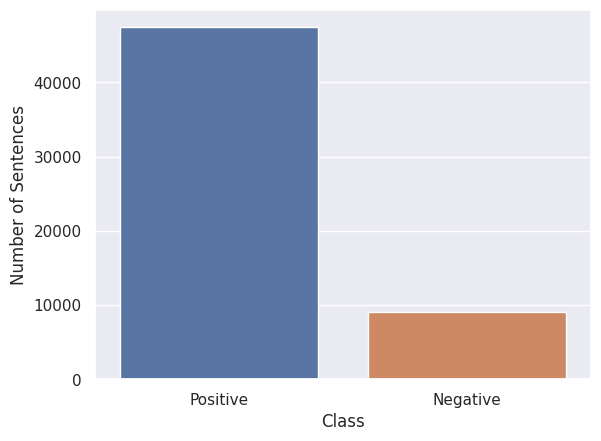

In [ ]:
# checking if the dataset is balanced or not
sns.set(style="darkgrid")
total = len(dataset)*1.
ax = sns.countplot(x="Own_Rating", data=dataset_new)
plt.xlabel('Class')
plt.ylabel('Number of Sentences')

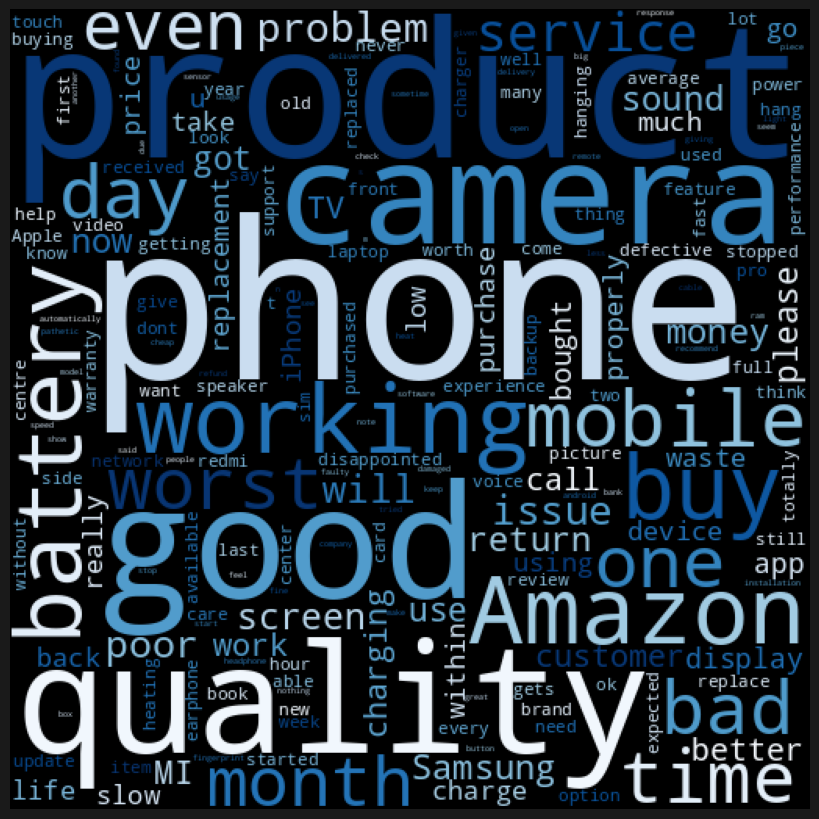

In [ ]:
# ploting a world cloud for negative worlds in a sentences
Neg_words = ' '.join(list(dataset_new[dataset_new['Own_Rating'] == 'Negative']['Review_text']))
Neg_wordcloud = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(Neg_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(Neg_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

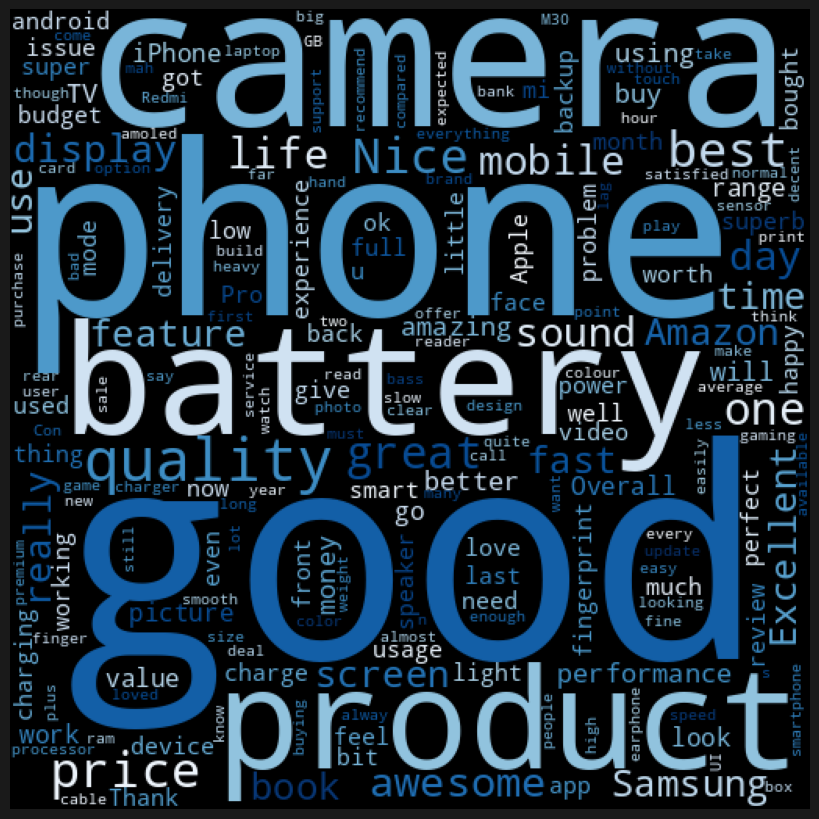

In [ ]:
# ploting a world cloud for Postive worlds in a sentences
Pos_words = ' '.join(list(dataset_new[dataset_new['Own_Rating'] == 'Positive']['Review_text']))
Pos_wordcloud = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(Pos_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(Pos_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# Calculate the number of characters in each review
dataset_new['num_characters'] = dataset_new['Review_text'].apply(len)

# Calculate the number of words in each review
dataset_new['num_words'] = dataset_new['Review_text'].apply(lambda x: len(x.split()))

# Calculate the number of unique words in each review
dataset_new['num_unique_words'] = dataset_new['Review_text'].apply(lambda x: len(set(x.split())))

# Calculate the 99th quantile for number of characters
quantile_99_characters = dataset_new['num_characters'].quantile(0.99)

# Calculate the average number of words
average_words = dataset_new['num_words'].mean()

# Calculate the number of words in the longest review
max_words_longest_review = dataset_new.loc[dataset_new['num_words'].idxmax()]['num_words']

# Calculate the number of words in the shortest review
min_words_shortest_review = dataset_new.loc[dataset_new['num_words'].idxmin()]['num_words']

# Calculate the 99th quantile for number of words
quantile_99_words = dataset_new['num_words'].quantile(0.99)

# Print the results
print(f"Average number of characters: {dataset_new['num_characters'].mean():.2f}")
print(f"Longest review characters: {dataset_new['num_characters'].max()}")
print(f"Shortest review characters: {dataset_new['num_characters'].min()}")
print(f"Number of characters of quantile 0.99: {quantile_99_characters:.2f}")

print(f"Average number of words: {average_words:.2f}")
print(f"Number of words in the longest review: {max_words_longest_review}")
print(f"Number of words in the shortest review: {min_words_shortest_review}")
print(f"Number of words of quantile 0.99: {quantile_99_words:.2f}")

print(f"Number of unique words: {dataset_new['num_unique_words'].sum()}")

<ipython-input-12-b24076a559db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['num_characters'] = dataset_new['Review_text'].apply(len)
<ipython-input-12-b24076a559db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['num_words'] = dataset_new['Review_text'].apply(lambda x: len(x.split()))


Average number of characters: 139.42
Longest review characters: 18256
Shortest review characters: 1
Number of characters of quantile 0.99: 1174.00
Average number of words: 25.22
Number of words in the longest review: 3318
Number of words in the shortest review: 1
Number of words of quantile 0.99: 215.00
Number of unique words: 1154060


<ipython-input-12-b24076a559db>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['num_unique_words'] = dataset_new['Review_text'].apply(lambda x: len(set(x.split())))


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [ ]:
TAG_CLEANING_RE = "@\S+"
# Remove @tags
dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: re.sub(TAG_CLEANING_RE, ' ', x))
print("Remove @tags : Done")

# Smart lowercase
dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: x.lower())
print("Smart lowercase : Done")

# Remove numbers
dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: re.sub(r'\d+', ' ', x))
print("Remove numbers : Done")

# Remove links
TEXT_CLEANING_RE = "https?:\S+|http?:\S|[^A-Za-z0-9]+"
dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: re.sub(TEXT_CLEANING_RE, ' ', x))
print("Remove links : Done")

# Remove white spaces
dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: x.strip())
print("Remove white spaces : Done")

# Tokenize into words
dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: word_tokenize(x))
print("Tokenize into words : Done")

# Remove non alphabetic tokens
dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: [word for word in x if word.isalpha()])
print("Remove non alphabetic tokens : Done")

# Filter out stop words
dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: [w for w in x if not w in stop_words])
print("Filter out stop words : Done")

# Word Lemmatization
dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: [lemmatizer.lemmatize(word,"v") for word in x])
print("Word Lemmatization : Done")

# Turn lists back to string
dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: ' '.join(x))
print("Turn lists back to string : Done")

print("========END=========")

<ipython-input-15-8490a21b37ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: re.sub(TAG_CLEANING_RE, ' ', x))
<ipython-input-15-8490a21b37ec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: x.lower())


Remove @tags : Done
Smart lowercase : Done


<ipython-input-15-8490a21b37ec>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: re.sub(r'\d+', ' ', x))


Remove numbers : Done


<ipython-input-15-8490a21b37ec>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: re.sub(TEXT_CLEANING_RE, ' ', x))
<ipython-input-15-8490a21b37ec>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: x.strip())


Remove links : Done
Remove white spaces : Done


<ipython-input-15-8490a21b37ec>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: word_tokenize(x))


Tokenize into words : Done


<ipython-input-15-8490a21b37ec>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: [word for word in x if word.isalpha()])


Remove non alphabetic tokens : Done


<ipython-input-15-8490a21b37ec>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: [w for w in x if not w in stop_words])


Filter out stop words : Done
Word Lemmatization : Done
Turn lists back to string : Done
========END=========


<ipython-input-15-8490a21b37ec>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: [lemmatizer.lemmatize(word,"v") for word in x])
<ipython-input-15-8490a21b37ec>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new['Review_text'] = dataset_new['Review_text'].map(lambda x: ' '.join(x))


In [ ]:
dataset_new.head(10)

,Unique_ID,Category,Review_Header,Review_text,Rating,Own_Rating,num_characters,num_words,num_unique_words
0,136040,smartTv,Nice one,like,5,Positive,10,3,3
1,134236,mobile,Huge battery life with amazing display,buy phone amazon use samsung couple weeks deli...,5,Positive,1271,231,141
2,113945,books,Four Stars,awesome book reasonable price must buy,4,Positive,52,8,8
3,168076,smartTv,Nice quality,good,5,Positive,4,1,1
5,146539,smartTv,Nice tv,nice tv pic quality good custmer srrvice tv in...,5,Positive,98,18,17
6,157661,smartTv,Beauty and the Beast,iphone legitimately among interest opinionated...,5,Positive,703,128,96
7,110329,mobile,"20000 mAH, what more you need",mah need super product,5,Positive,44,8,8
8,157473,mobile,Need more good quality,company give bettany backup screen saver,2,Negative,60,10,10
9,163223,mobile accessories,Good phone,good phone,5,Positive,15,3,3
10,128878,smartTv,Good option for AI home,good option,4,Positive,11,2,2


In [ ]:
# splitting the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(dataset_new["Review_text"], dataset_new["Own_Rating"], test_size = 0.2, random_state = 42)

In [ ]:
#using TFID vectorizor
tfidfVectorizer = TfidfVectorizer()

# Fit and transform the training data
x_train_tfidf = tfidfVectorizer.fit_transform(x_train)

# Transform the test data
x_test_tfidf = tfidfVectorizer.transform(x_test)

In [ ]:
random = RandomForestClassifier()

In [ ]:
random.fit(x_train_tfidf,y_train)

RandomForestClassifier()

In [ ]:
random_pred = random.predict(x_test_tfidf)

In [ ]:
class_report = classification_report(y_test, random_pred)

In [ ]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.86      0.59      0.70      1831
    Positive       0.93      0.98      0.95      9468

    accuracy                           0.92     11299
   macro avg       0.89      0.79      0.83     11299
weighted avg       0.91      0.92      0.91     11299



In [ ]:
cm_random = confusion_matrix(y_test, random_pred  )
print("Confusion Matrix:")
print(cm_random)

Confusion Matrix:
[[1078  753]
 [ 174 9294]]


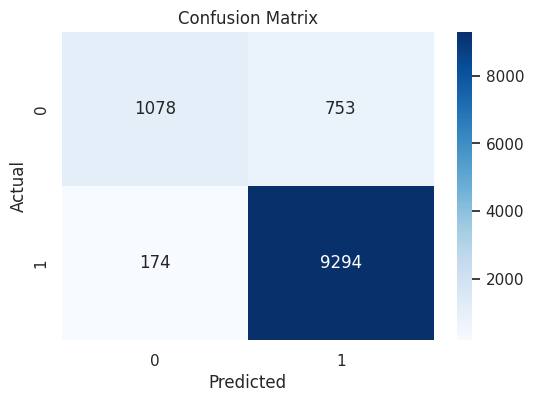

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_random, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
logistic = LogisticRegression()

In [ ]:
logistic.fit(x_train_tfidf,y_train)

LogisticRegression()

In [ ]:
logistic_pred = logistic.predict(x_test_tfidf)

In [ ]:
class_report = classification_report(y_test, logistic_pred)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.87      0.62      0.72      1831
    Positive       0.93      0.98      0.96      9468

    accuracy                           0.92     11299
   macro avg       0.90      0.80      0.84     11299
weighted avg       0.92      0.92      0.92     11299



In [ ]:
cm_logistic = confusion_matrix(y_test, logistic_pred  )
print("Confusion Matrix:")
print(cm_logistic)

Confusion Matrix:
[[1141  690]
 [ 176 9292]]


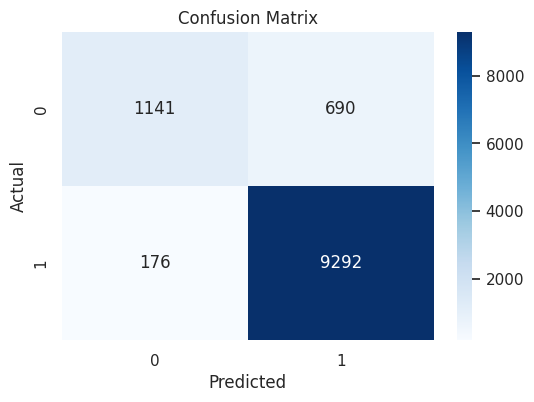

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
naiveByes = MultinomialNB()

In [ ]:
naiveByes.fit(x_train_tfidf,y_train)

MultinomialNB()

In [ ]:
NB_prediction = naiveByes.predict(x_test_tfidf)

In [ ]:
class_report = classification_report(y_test, NB_prediction)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.90      0.32      0.48      1831
    Positive       0.88      0.99      0.94      9468

    accuracy                           0.88     11299
   macro avg       0.89      0.66      0.71     11299
weighted avg       0.89      0.88      0.86     11299



In [ ]:
cm_NB = confusion_matrix(y_test, NB_prediction)
print("Confusion Matrix:")
print(cm_NB)

Confusion Matrix:
[[ 590 1241]
 [  63 9405]]


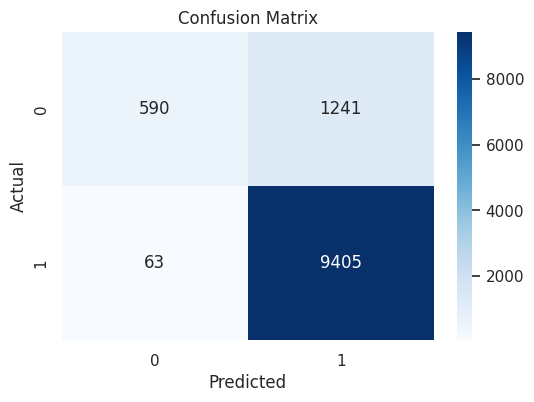

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_NB, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
decision_tree = DecisionTreeClassifier()

In [ ]:
decision_tree.fit(x_train_tfidf,y_train)

DecisionTreeClassifier()

In [ ]:
D_T_prediction = decision_tree.predict(x_test_tfidf)

In [ ]:
class_report = classification_report(y_test, D_T_prediction)
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

    Negative       0.68      0.63      0.65      1831
    Positive       0.93      0.94      0.94      9468

    accuracy                           0.89     11299
   macro avg       0.80      0.78      0.79     11299
weighted avg       0.89      0.89      0.89     11299



In [ ]:
cm_D_T = confusion_matrix(y_test, D_T_prediction)
print("Confusion Matrix:")
print(cm_D_T)

Confusion Matrix:
[[1148  683]
 [ 544 8924]]


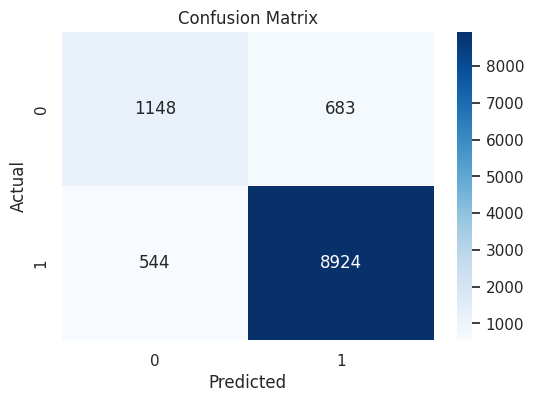

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_D_T, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## **LSTM**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
tokenizer = Tokenizer()
reviews_to_list = dataset_new['Review_text'].tolist()
tokenizer.fit_on_texts(reviews_to_list)
text_sequences = np.array(tokenizer.texts_to_sequences(reviews_to_list))

<ipython-input-37-4463076aa36c>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  text_sequences = np.array(tokenizer.texts_to_sequences(reviews_to_list))


In [ ]:
data = pd.get_dummies(dataset_new, columns=['Own_Rating'])

In [ ]:
# Setting the maximum number of words
max_words = 500

In [ ]:
X = pad_sequences(text_sequences, maxlen=max_words)
y = np.array(data[['Own_Rating_Positive', 'Own_Rating_Negative']])

In [ ]:
X_train_LSTM, X_test_LSTM, y_train_LSTM, y_test_LSTM = train_test_split(X,y,test_size = 0.2,random_state =0)

In [ ]:
# Create the LSTM model
model = Sequential(name="LSTM_Model")
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
model.fit(X_train_LSTM, y_train_LSTM, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
565/565 [==============================] - 542s 952ms/step - loss: 0.2507 - accuracy: 0.9053 - val_loss: 0.2071 - val_accuracy: 0.9260
Epoch 2/10
565/565 [==============================] - 540s 956ms/step - loss: 0.1907 - accuracy: 0.9286 - val_loss: 0.2281 - val_accuracy: 0.9176
Epoch 3/10
565/565 [==============================] - 535s 947ms/step - loss: 0.1561 - accuracy: 0.9433 - val_loss: 0.2120 - val_accuracy: 0.9271
Epoch 4/10
565/565 [==============================] - 498s 881ms/step - loss: 0.1385 - accuracy: 0.9520 - val_loss: 0.2238 - val_accuracy: 0.9241
Epoch 5/10
565/565 [==============================] - 497s 880ms/step - loss: 0.1273 - accuracy: 0.9572 - val_loss: 0.2335 - val_accuracy: 0.9235
Epoch 6/10
565/565 [==============================] - 496s 878ms/step - loss: 0.1190 - accuracy: 0.9604 - val_loss: 0.2396 - val_accuracy: 0.9209
Epoch 7/10
565/565 [==============================] - 534s 946ms/step - loss: 0.1115 - accuracy: 0.9633 - val_loss: 0.2385 -

In [ ]:
y_pred = model.predict(X_test_LSTM)

354/354 [==============================] - 41s 115ms/step


In [ ]:
# Convert the probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_LSTM, axis=1)

In [ ]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[9126  372]
 [ 507 1294]]


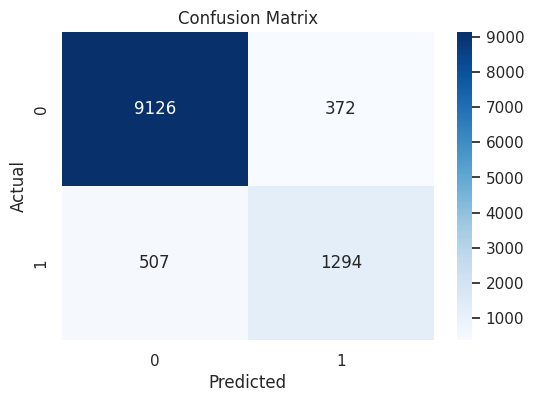

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
report = classification_report(y_test_classes, y_pred_classes)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      9498
           1       0.78      0.72      0.75      1801

    accuracy                           0.92     11299
   macro avg       0.86      0.84      0.85     11299
weighted avg       0.92      0.92      0.92     11299

